In [9]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt 

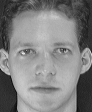

In [98]:
im = Image.open("images/f1.pgm")
im

In [103]:
import numpy
import pandas as pd
pd.DataFrame(numpy.array(im))


,0,1,2,3,4,5,6,7,8,9,...,82,83,84,85,86,87,88,89,90,91
0,48,49,45,47,49,57,39,42,53,49,...,58,46,41,43,56,55,51,56,56,54
1,45,52,39,46,56,45,39,47,48,40,...,57,47,38,39,39,51,53,52,50,51
2,45,50,42,51,51,45,40,48,44,37,...,54,52,47,41,33,49,51,48,53,50
3,49,46,47,47,50,47,42,45,40,44,...,72,57,46,39,35,31,43,43,50,51
4,46,46,47,48,48,44,43,44,60,54,...,72,64,43,46,31,34,38,41,53,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,49,47,49,47,52,50,48,51,47,49,...,37,42,38,45,45,42,50,41,48,49
108,45,52,43,52,48,49,51,52,46,47,...,35,39,43,43,47,42,48,45,48,45
109,50,48,50,46,50,47,51,50,48,46,...,40,41,39,41,46,46,44,45,46,46
110,45,54,49,46,50,50,47,46,50,47,...,37,41,39,42,43,50,45,46,47,47


In [71]:
from PIL import Image
import numpy as np


def pca(X):
  """  Principal Component Analysis
    input: X, matrix with training data stored as flattened arrays in rows
    return: projection matrix (with important dimensions first), variance
    and mean."""

  # get dimensions
  num_data,dim = X.shape

  # center data
  mean_X = X.mean(axis=0)
  X = X - mean_X

  if dim>num_data:
    # PCA - compact trick used
    M = np.dot(X,X.T) # covariance matrix
    e,EV = np.linalg.eigh(M) # eigenvalues and eigenvectors
    tmp = np.dot(X.T,EV).T # this is the compact trick
    V = tmp[::-1] # reverse since last eigenvectors are the ones we want
    S = np.sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
    for i in range(V.shape[1]):
      V[:,i] /= S
  else:
    # PCA - SVD used
    U,S,V = np.linalg.svd(X)
    V = V[:num_data] # only makes sense to return the first num_data

  # return the projection matrix, the variance and the mean
  return V,S,mean_X

C:\Users\PRASHA~1\AppData\Local\Temp/ipykernel_28772/3344933438.py:24: RuntimeWarning: invalid value encountered in sqrt
  S = np.sqrt(e)[::-1] # reverse since eigenvalues are in increasing order
c:\Python_VENVs\dtsci\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
c:\Python_VENVs\dtsci\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2


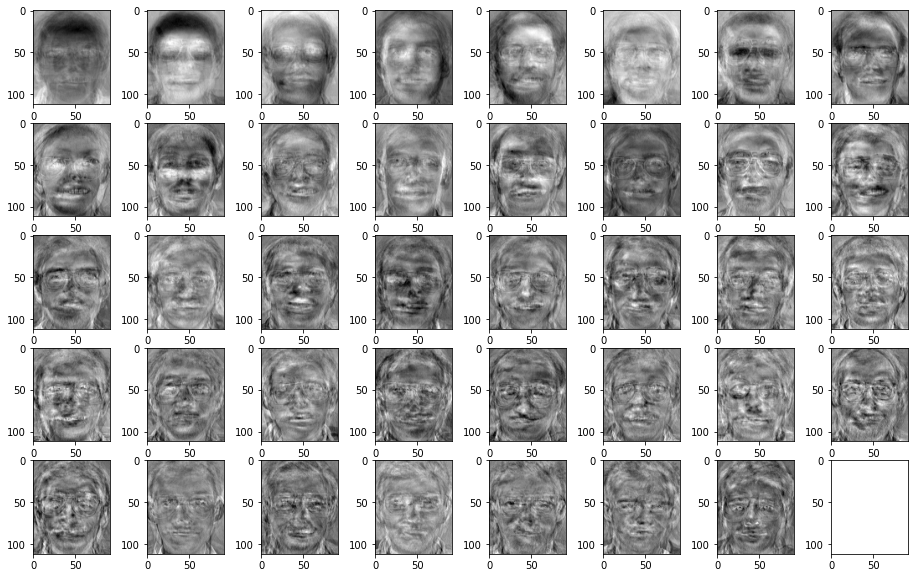

In [104]:
from PIL import Image
from numpy import array
from pylab import imshow, figure, subplot, gray, show

imlist = []
for i in range(1, 41):
    imlist.append(f"images/f{i}.pgm")

im = array(Image.open(imlist[0]))
m,n = im.shape

all_ims = array([array(Image.open(im)).flatten()
              for im in imlist],'f')

# perform PCA
V,S,immean = pca(all_ims)

figure(figsize=(16, 10))
gray()
subplot(5,8,1)
for i in range(40):
  subplot(5, 8,i+1)
  imshow(V[i].reshape(m,n))

show()

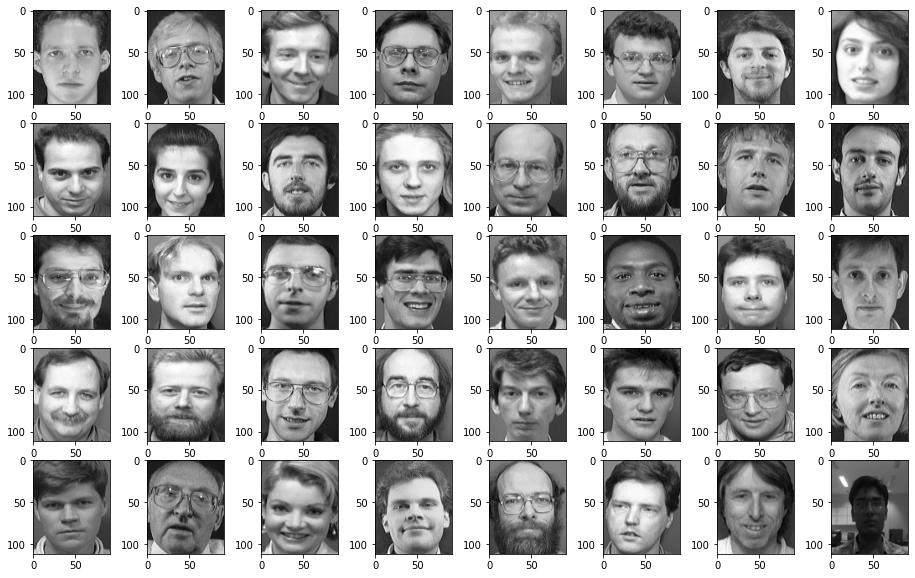

In [97]:
figure(figsize=(16, 10))
for i in range(40):
  subplot(5, 8,i+1)
  imshow(Image.open(imlist[i]))

show()